In [3]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Model architecture
class GraphColoringModel(tf.keras.Model):
    def __init__(self, node_count, hidden_size=1024, num_layers=3):
        super(GraphColoringModel, self).__init__()
        self.node_count = node_count
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstms = [LSTM(hidden_size, return_sequences=True) for _ in range(num_layers)]
        self.dense = Dense(1, activation='relu')

    def call(self, inputs):
        x = tf.cast(inputs, dtype=tf.float32)  # Convert input tensor to float32
        for lstm in self.lstms:
            x = lstm(x)
        x = self.dense(x)
        return x

# Color correction algorithm
def color_correction(graph, colors):
    corrected_colors = colors.copy()
    invalid_edges = []
    for i, (u, v) in enumerate(graph.edges):
        if corrected_colors[u] == corrected_colors[v]:
            invalid_edges.append(i)

    for edge_idx in invalid_edges:
        u, v = graph.edges[edge_idx]
        neighbors_u = set(graph.neighbors[u])
        neighbors_v = set(graph.neighbors[v])

        available_colors_u = set(range(1, graph.node_count + 1)) - set(corrected_colors[n] for n in neighbors_u)
        available_colors_v = set(range(1, graph.node_count + 1)) - set(corrected_colors[n] for n in neighbors_v)

        if available_colors_u:
            corrected_colors[u] = min(available_colors_u)
        elif available_colors_v:
            corrected_colors[v] = min(available_colors_v)
        else:
            new_color = max(corrected_colors) + 1
            corrected_colors[u] = new_color

    return corrected_colors

# Graph representation
class Graph:
    def __init__(self, adjacency_matrix):
        self.adjacency_matrix = adjacency_matrix
        self.node_count = len(adjacency_matrix)
        self.edges = []
        self.neighbors = {node: [] for node in range(self.node_count)}

        for u in range(self.node_count):
            for v in range(self.node_count):
                if adjacency_matrix[u][v]:
                    self.edges.append((u, v))
                    self.neighbors[u].append(v)
                    self.neighbors[v].append(u)

# Data preprocessing
def preprocess_data(graphs):
    X = []
    y = []
    for graph in graphs:
        adjacency_matrix = graph.adjacency_matrix
        X.append(adjacency_matrix)
        y.append([])
        for node in range(graph.node_count):
            node_color = sum(adjacency_matrix[node]) + 1
            y[-1].append(node_color)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Training
def train(graphs, epochs=100, batch_size=32):
    X, y = preprocess_data(graphs)
    model = GraphColoringModel(node_count=X.shape[1])
    model.compile(optimizer='adam', loss='mean_absolute_error')
    model.fit(X, y, epochs=epochs, batch_size=batch_size)
    return model

# Inference
def infer(model, graph):
    adjacency_matrix = np.expand_dims(graph.adjacency_matrix, axis=0)
    colors = model.predict(adjacency_matrix)[0]
    colors = [int(color) for color in colors]
    return colors

# Example usage
# Generate or load some graphs
graphs = [
    Graph([[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 0]]),
    Graph([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]),
    # ... more graphs
]

# Train the model
model = train(graphs)

# Infer colors for a new graph
new_graph = Graph([[0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0]])
colors = infer(model, new_graph)

# Apply color correction
corrected_colors = color_correction(new_graph, colors)
print("Corrected colors:", corrected_colors)


Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 3.2495
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.1360
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 2.8380
Epoch 4/100
1/1 [==============================] - 1s 987ms/step - loss: 2.0757
Epoch 5/100
1/1 [==============================] - 1s 884ms/step - loss: 2.4637
Epoch 6/100
1/1 [==============================] - 1s 874ms/step - loss: 2.8099
Epoch 7/100
1/1 [==============================] - 1s 866ms/step - loss: 2.1244
Epoch 8/100
1/1 [==============================] - 1s 851ms/step - loss: 1.8796
Epoch 9/100
1/1 [==============================] - 1s 836ms/step - loss: 1.8228
Epoch 10/100
1/1 [==============================] - 1s 869ms/step - loss: 2.0369
Epoch 11/100
1/1 [==============================] - 1s 866ms/step - loss: 2.0083
Epoch 12/100
1/1 [==============================] - 1s 862ms/step - loss: 1.8169
Epoch 13/100
1/1 [==========================

<ipython-input-3-d1cd8a58e7cb>:92: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colors = [int(color) for color in colors]


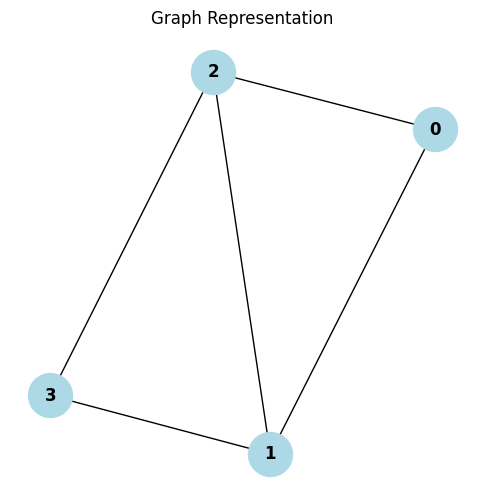

Epoch 1/100
1/1 [==============================] - 18s 18s/step - loss: 3.5000 - val_loss: 3.0000
Epoch 2/100
1/1 [==============================] - 0s 466ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 3/100
1/1 [==============================] - 0s 445ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 4/100
1/1 [==============================] - 0s 475ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 5/100
1/1 [==============================] - 0s 457ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 6/100
1/1 [==============================] - 1s 503ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 7/100
1/1 [==============================] - 1s 552ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 8/100
1/1 [==============================] - 1s 615ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 9/100
1/1 [==============================] - 1s 614ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 10/100
1/1 [==============================] - 1s 668ms/step - loss: 3.5000 - val_loss: 3.0000
Epoch 11/1

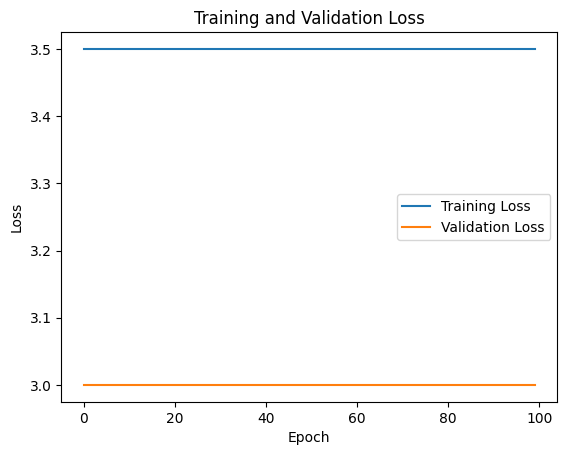

1/1 [==============================] - 2s 2s/step
Corrected colors: [1, 2, 1, 3]


<ipython-input-4-5e9fbd30bd4e>:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colors = [int(color) for color in colors]


In [4]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Model architecture
class GraphColoringModel(tf.keras.Model):
    def __init__(self, node_count, hidden_size=1024, num_layers=3):
        super(GraphColoringModel, self).__init__()
        self.node_count = node_count
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.lstms = [LSTM(hidden_size, return_sequences=True) for _ in range(num_layers)]
        self.dense = Dense(1, activation='relu')

    def call(self, inputs):
        x = tf.cast(inputs, dtype=tf.float32)  # Convert input tensor to float32
        for lstm in self.lstms:
            x = lstm(x)
        x = self.dense(x)
        return x

# Color correction algorithm
def color_correction(graph, colors):
    corrected_colors = colors.copy()
    invalid_edges = []
    for i, (u, v) in enumerate(graph.edges):
        if corrected_colors[u] == corrected_colors[v]:
            invalid_edges.append(i)

    for edge_idx in invalid_edges:
        u, v = graph.edges[edge_idx]
        neighbors_u = set(graph.neighbors[u])
        neighbors_v = set(graph.neighbors[v])

        available_colors_u = set(range(1, graph.node_count + 1)) - set(corrected_colors[n] for n in neighbors_u)
        available_colors_v = set(range(1, graph.node_count + 1)) - set(corrected_colors[n] for n in neighbors_v)

        if available_colors_u:
            corrected_colors[u] = min(available_colors_u)
        elif available_colors_v:
            corrected_colors[v] = min(available_colors_v)
        else:
            new_color = max(corrected_colors) + 1
            corrected_colors[u] = new_color

    return corrected_colors

# Graph representation
class Graph:
    def __init__(self, adjacency_matrix):
        self.adjacency_matrix = adjacency_matrix
        self.node_count = len(adjacency_matrix)
        self.edges = []
        self.neighbors = {node: [] for node in range(self.node_count)}

        for u in range(self.node_count):
            for v in range(self.node_count):
                if adjacency_matrix[u][v]:
                    self.edges.append((u, v))
                    self.neighbors[u].append(v)
                    self.neighbors[v].append(u)

    def plot(self):
        plt.figure(figsize=(6, 6))
        plt.title("Graph Representation")
        G = nx.Graph()
        G.add_nodes_from(range(self.node_count))
        G.add_edges_from(self.edges)
        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_weight='bold', font_size=12)
        plt.show()

# Data preprocessing
def preprocess_data(graphs):
    X = []
    y = []
    for graph in graphs:
        adjacency_matrix = graph.adjacency_matrix
        X.append(adjacency_matrix)
        y.append([])
        for node in range(graph.node_count):
            node_color = sum(adjacency_matrix[node]) + 1
            y[-1].append(node_color)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Training
def train(graphs, epochs=100, batch_size=32, validation_split=0.1):
    X, y = preprocess_data(graphs)
    model = GraphColoringModel(node_count=X.shape[1])
    model.compile(optimizer='adam', loss='mean_absolute_error')
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    return model, history

# Inference
def infer(model, graph):
    adjacency_matrix = np.expand_dims(graph.adjacency_matrix, axis=0)
    colors = model.predict(adjacency_matrix)[0]
    colors = [int(color) for color in colors]
    return colors

# Example usage

# Generate or load some graphs
graphs = [
    Graph([[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 0]]),
    Graph([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]),
    # ... more graphs
]

# Plot example graph
graphs[0].plot()

# Train the model
model, history = train(graphs)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Infer colors for a new graph
new_graph = Graph([[0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0]])
colors = infer(model, new_graph)

# Apply color correction
corrected_colors = color_correction(new_graph, colors)
print("Corrected colors:", corrected_colors)


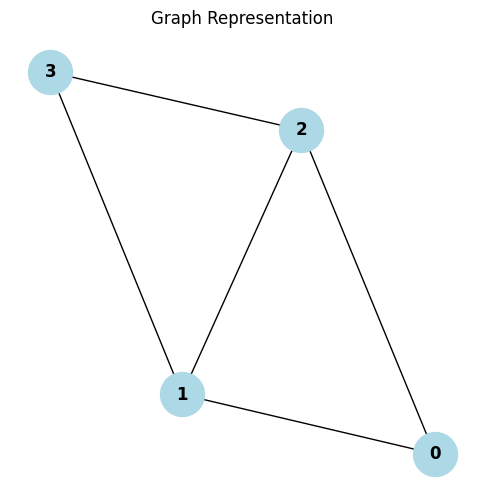

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 3.4990 - val_loss: 2.9001
Epoch 2/100
1/1 [==============================] - 0s 466ms/step - loss: 3.3755 - val_loss: 2.6478
Epoch 3/100
1/1 [==============================] - 0s 454ms/step - loss: 3.0550 - val_loss: 2.0164
Epoch 4/100
1/1 [==============================] - 0s 460ms/step - loss: 2.2450 - val_loss: 2.0968
Epoch 5/100
1/1 [==============================] - 0s 441ms/step - loss: 2.7819 - val_loss: 2.3799
Epoch 6/100
1/1 [==============================] - 0s 448ms/step - loss: 2.9982 - val_loss: 1.8392
Epoch 7/100
1/1 [==============================] - 0s 446ms/step - loss: 2.4078 - val_loss: 1.6234
Epoch 8/100
1/1 [==============================] - 0s 433ms/step - loss: 2.1427 - val_loss: 1.7739
Epoch 9/100
1/1 [==============================] - 0s 457ms/step - loss: 1.9818 - val_loss: 2.1026
Epoch 10/100
1/1 [==============================] - 0s 469ms/step - loss: 2.3565 - val_loss: 2.1558
Epoch 11/1

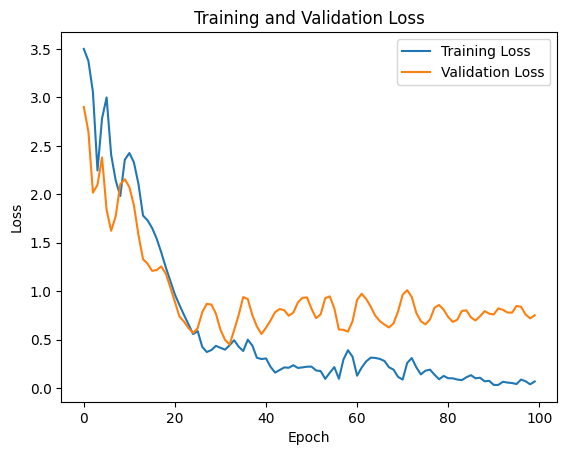

1/1 [==============================] - 2s 2s/step
Corrected colors: [2, 1, 2, 3]


<ipython-input-4-5e9fbd30bd4e>:104: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  colors = [int(color) for color in colors]


In [5]:
# Example usage

# Generate or load some graphs
graphs = [
    Graph([[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 1], [0, 1, 1, 0]]),
    Graph([[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]),
    # ... more graphs
]

# Plot example graph
graphs[0].plot()

# Train the model
model, history = train(graphs)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Infer colors for a new graph
new_graph = Graph([[0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0]])
colors = infer(model, new_graph)

# Apply color correction
corrected_colors = color_correction(new_graph, colors)
print("Corrected colors:", corrected_colors)
